# label id

In [1]:
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2 as cv
# file_path = "./Face_Tongue/Face/Dataset_Face/Database_Facial_Blocks" #time 1m
import time
from tqdm import tqdm

import xlrd
raw_data = pd.read_excel("./21批数据库总标签.xlsx")
# raw_data = pd.read_excel("./21批数据库总标签2.xls")

index = []
for i in raw_data['自用标签']:
    index.append(i)
label_raw = []
gender = []
age = []
for i in raw_data['诊断标签']:
    label_raw.append(i)

for i in raw_data['性别']:
    gender.append(i)
    
for i in raw_data['年龄']:
    age.append(i)
df = {}
df_gender = {}
df_age = {}
for i in range(len(index)):
    df.update({index[i] : label_raw[i]}) #文件name和label的对应关系
    df_gender.update({index[i]: gender[i]})
    df_age.update({index[i]: age[i]})

In [2]:
halfface = []
hf_path = './images_sublingual_seg_old/'
hf_files = sorted(os.listdir(hf_path))

In [3]:
labels = []
labels_raw = []
for i in tqdm(range(0, len(hf_files))):
    index = hf_files[i].replace('.bmp', '')
    
    if index not in df or type(df[index]) ==float:
        continue
    labels_raw.append(df[index])
    if '糖' in df[index]:
        labels.append('糖')
    elif '乳' in df[index]:
        labels.append('乳')
    elif '脂肪' in df[index]:
        labels.append('脂肪')
    elif '脂' in df[index] and '血' in df[index]:
        labels.append('血脂')
    elif '肾' in df[index]:
        labels.append('肾')
    elif '胃炎' in df[index]:
        labels.append('胃炎')
    elif '尿酸' in df[index]:
        labels.append('尿酸')
    elif '心动' in df[index]:
        labels.append('心动过缓')
    elif '血压' in df[index]:
        labels.append('高血压')
    elif '肺' in df[index]:
        labels.append('肺')
    else:
        labels.append(df[index])

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8107/8107 [00:00<00:00, 472700.29it/s]


In [4]:
from collections import Counter
Counter(labels).most_common()

[('健康', 1073),
 ('血脂', 599),
 ('肾', 578),
 ('乳', 521),
 ('糖', 501),
 ('脂肪', 431),
 ('肺', 297),
 ('高血压', 249),
 ('心动过缓', 233),
 ('胃炎', 194),
 ('尿酸', 187),
 ('窦性心律不齐', 83),
 ('失眠', 79),
 ('冠状动脉粥样硬化性心脏病', 63),
 ('睡眠障碍', 61),
 ('胆囊息肉', 59),
 ('子宫肌瘤', 51),
 ('甲状腺1度肿大', 43),
 ('前列腺钙化', 35),
 ('冠心病', 33),
 ('脑梗死', 32),
 ('肝恶性肿瘤', 31),
 ('疲劳综合征', 31),
 ('急性上呼吸道感染', 29),
 ('咳嗽', 29),
 ('发热', 25),
 ('腹痛', 23),
 ('健康查体', 22),
 ('尿潜血查因', 21),
 ('代谢综合征', 20),
 ('月经失调', 19),
 ('泌尿道感染', 18),
 ('腰痛', 18),
 ('子宫平滑肌瘤', 18),
 ('心律不齐', 17),
 ('肝血管瘤', 16),
 ('手术后恶性肿瘤化学治疗', 15),
 ('痤疮', 15),
 ('胆红素升高查因', 15),
 ('高黏血症', 15),
 ('水肿', 15),
 ('治疗后恢复期', 14),
 ('肝囊肿', 14),
 ('胆固醇升高', 14),
 ('肝胆管结石', 14),
 ('肝功能异常', 13),
 ('慢性咽炎', 13),
 ('抑郁', 13),
 ('结膜炎', 12),
 ('头痛', 12),
 ('甲状腺机能亢进症', 12),
 ('小细胞低色素性轻度贫血', 12),
 ('甲状腺2度肿大', 12),
 ('血尿', 12),
 ('湿疹', 11),
 ('尿路感染待排', 11),
 ('急性胃肠炎', 11),
 ('焦虑', 11),
 ('子宫内膜息肉', 11),
 ('尿浊', 11),
 ('HP阳性', 10),
 ('慢性前列腺炎', 10),
 ('月经不规则', 10),
 ('咽炎', 10),
 ('胆囊结石', 10),
 ('轻度贫

In [5]:
sub_index = []
for name in os.listdir(hf_path):
    index = name.replace('.bmp', '')
    #if index in existInRoi:
    sub_index.append(index)

# construct data

In [8]:
import numpy as np
import pandas as pd
X = pd.DataFrame(columns=['gender', 'age', 'roi_img', 'seg_img', 'label'], index = np.unique(sub_index)) 
for i in tqdm(X.index):
    index = i
    
    img = cv.imread(hf_path+index+'.bmp', cv.IMREAD_COLOR)
#     img_seg = cv.imread(sub_path+index+'.bmp', cv.IMREAD_COLOR)
    
#     plt.imshow(img[100:100+size, 350:350+size, :])

#     for j in range(5):
    if index not in df or type(df[index]) ==float:
        continue
    X.loc[index]['age'] = df_age[index]
    
    X.loc[index]['gender'] = df_gender[index]
    X.loc[index]['seg_img'] = img
    
    #label
    if '糖' in df[index]:
        X.loc[index]['label']='糖'
    elif '乳' in df[index]:
        X.loc[index]['label']='乳'
    elif '脂肪' in df[index]:
        X.loc[index]['label']='脂肪'
    elif '脂' in df[index] and '血' in df[index]:
#     elif '血脂' in df[index]:
        X.loc[index]['label']='血脂'
    elif '肾' in df[index]:
        X.loc[index]['label']='肾'
#     elif '慢性肾脏' in df[index]:
#         X.loc[index]['label']='慢性肾脏'
    elif '胃炎' in df[index]:
        X.loc[index]['label']='胃炎'
    elif '尿酸' in df[index]:
        X.loc[index]['label']='尿酸'
    elif '心动' in df[index]:
        X.loc[index]['label']='心动过缓'
    elif '血压' in df[index]:
        X.loc[index]['label']='高血压'
    elif '肺' in df[index]:
        X.loc[index]['label'] = '肺'
    else:
        #labels.append(df[index])
        X.loc[index]['label'] = df[index]

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8107/8107 [00:01<00:00, 4085.30it/s]


# feature extract


## PCA.. not suit


In [24]:
from sklearn.decomposition import PCA


# def pca_face_transform(X, components = 60):
#     pca = PCA(n_components = components)
#     pca_face=[]
#     y=[]
#     for i in tqdm(range(len(X))):
#         cur_pca=[]
#         y.append(X.iloc[i].label)
#         for j in range(1, 10):
#             im = X.iloc[i, -j].copy()

#             im = cv.cvtColor(im, cv.COLOR_BGR2XYZ)
#             cur_pca.extend(im.reshape(-1))
#         pca_face.append(cur_pca)
#     pca_face = np.array(pca_face)
    
#     return pca.fit_transform(pca_face), le.fit_transform(y)

def pca_transform_single(X, col='seg_img',  components = 60):
    pca = PCA(n_components = components)
    pca_seg=[]
    y=[]
    for i in tqdm(range(len(X))):
        im = X[col][i].copy()
        y.append(X.iloc[i].label)
        
        im = cv.cvtColor(im, cv.COLOR_BGR2LUV)
#         im = my_rescale(im, rate)
        pca_seg.append(im.reshape(-1))
    pca_seg = np.array(pca_seg)
    return pca.fit_transform(pca_seg)#, le.fit_transform(y)

# def pca_single_combine(X,  rate = 1/2, components = 60):
#     time1 = time.time()
#     p1, y = pca_transform_single(X, 'face1', rate, components = components)
#     p2, _ = pca_transform_single(X, 'face2',  rate,components = components)
#     p3, _ = pca_transform_single(X, 'face3', rate, components = components)
#     p4, _ = pca_transform_single(X, 'face4',  rate,components = components)
#     p5, _ = pca_transform_single(X, 'face5',  rate,components = components)
#     p6, _ = pca_transform_single(X, 'face8',  rate,components = components)
#     p7, _ = pca_transform_single(X, 'face9',  rate,components = components)
#     print('time per sample:', (time.time() - time1)/len(X))
#     return np.concatenate((p1, p2, p3, p4, p5, p6, p7), axis = 1), y

## color hist

### visual

In [9]:
# 可以转色彩分布图然后归一化
import cv2 as cv
tmp = X_dm['seg_img'][0]
print(tmp.shape)
r, g, b = cv.split(tmp)
# mask = np.ones(r.shape, np.uint8)
# H, W = r.shape
# mask = mask.reshape(-1)

# mask = (r!=255)
# mask = mask.reshape(H, W)
r_hist = cv.calcHist([r], [0], None, [256], [0, 256])
g_hist = cv.calcHist([g], [0], None, [256], [0, 256])
b_hist = cv.calcHist([b], [0], None, [256], [0, 256])

#normalization
r_norm = r_hist[:-1]/sum(r_hist[:-1])
g_norm = g_hist[:-1]/sum(g_hist[:-1])
b_norm = b_hist[:-1]/sum(b_hist[:-1])
res = np.concatenate([r_norm, g_norm, b_norm], 0)
#每一个图片转成765长度的3通道像素分布

NameError: name 'X_dm' is not defined

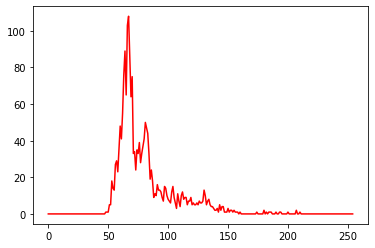

In [114]:
plt.plot(r_hist[:-1], c='r')

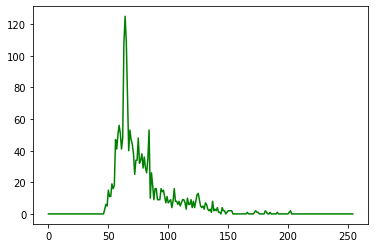

In [112]:
plt.plot(g_hist[:-1], c='g')

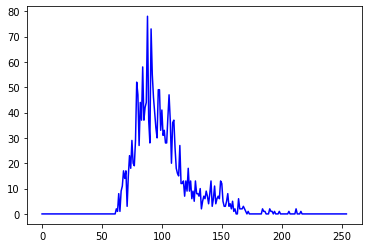

In [113]:
plt.plot(b_hist[:-1], c='b')

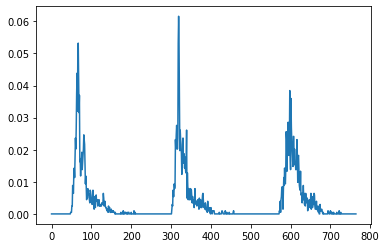

In [108]:
plt.plot(res)

### algorithm

In [10]:
from sklearn import preprocessing
import cv2 as cv
le = preprocessing.LabelEncoder()
def color_hist(X):
    hists = []
    y = []
    for i in tqdm(range(len(X))):
        im = X['seg_img'][i].copy()
        
        y.append(X.iloc[i].label)
        r, g, b = cv.split(im)

        r_hist = cv.calcHist([r], [0], None, [256], [0, 256])
        g_hist = cv.calcHist([g], [0], None, [256], [0, 256])
        b_hist = cv.calcHist([b], [0], None, [256], [0, 256])

        #normalization
        r_norm = r_hist[:-1]/sum(r_hist[:-1])
        g_norm = g_hist[:-1]/sum(g_hist[:-1])
        b_norm = b_hist[:-1]/sum(b_hist[:-1])
        res = np.concatenate([r_norm, g_norm, b_norm], 0).reshape(-1)
        
        hists.append(res)
        
    return np.array(hists), le.fit_transform(y)

### multi-channel color hist
more than 3 channels

In [21]:
def color_hist_multi(X):
    hists = []
    y = []
    for i in tqdm(range(len(X))):
        im = X['seg_img'][i].copy()
        hsv = cv.cvtColor(im, cv.COLOR_BGR2HSV)
        
        y.append(X.iloc[i].label)
        r, g, b = cv.split(im)
        
        h, s, v = cv.split(hsv)

        r_hist = cv.calcHist([r], [0], None, [256], [0, 256])
        g_hist = cv.calcHist([g], [0], None, [256], [0, 256])
        b_hist = cv.calcHist([b], [0], None, [256], [0, 256])
        
        h_hist = cv.calcHist([h], [0], None, [256], [0, 256])
        s_hist = cv.calcHist([s], [0], None, [256], [0, 256])
        v_hist = cv.calcHist([v], [0], None, [256], [0, 256])
        #normalization
        r_norm = r_hist[:-1]/sum(r_hist[:-1])
        g_norm = g_hist[:-1]/sum(g_hist[:-1])
        b_norm = b_hist[:-1]/sum(b_hist[:-1])
        
        h_norm = h_hist[:-1]/sum(h_hist[:-1])
        s_norm = s_hist[:-1]/sum(s_hist[:-1])
        v_norm = v_hist[:-1]/sum(v_hist[:-1])
        res = np.concatenate([r_norm, g_norm, b_norm, h_norm, s_norm, v_norm], 0).reshape(-1)
        
        hists.append(res)
        
    return np.array(hists), le.fit_transform(y)

## LBP hist

In [11]:
def LBP(src):
    '''
    :param src:灰度图像
    :return:
    '''
    height = src.shape[0]
    width = src.shape[1]
    dst = src.copy()
    lbp_value = np.zeros((1,8), dtype=np.uint8)
    #print(lbp_value)
    neighbours = np.zeros((1,8), dtype=np.uint8)
    #print(neighbours)
    for x in range(1, width-1):
        for y in range(1, height-1):
            neighbours[0, 0] = src[y - 1, x - 1]
            neighbours[0, 1] = src[y - 1, x]
            neighbours[0, 2] = src[y - 1, x + 1]
            neighbours[0, 3] = src[y, x - 1]
            neighbours[0, 4] = src[y, x + 1]
            neighbours[0, 5] = src[y + 1, x - 1]
            neighbours[0, 6] = src[y + 1, x]
            neighbours[0, 7] = src[y + 1, x + 1]
            center = src[y, x]
            for i in range(8):
                if neighbours[0, i] > center:
                    lbp_value[0, i] = 1
                else:
                    lbp_value[0, i] = 0

            lbp = lbp_value[0, 0] * 1 + lbp_value[0, 1] * 2 + lbp_value[0, 2] * 4 + lbp_value[0, 3] * 8 \
                + lbp_value[0, 4] * 16 + lbp_value[0, 5] * 32 + lbp_value[0, 6] * 64 + lbp_value[0, 7] * 128
            
            #print(lbp)
            dst[y, x] = lbp

    return dst
def lbp_hist(X):
    hists = []
    y = []
    for i in tqdm(range(len(X))):
        im = X['seg_img'][i].copy()
        im = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
        y.append(X.iloc[i].label)
        im_lbp = LBP(im)
        res = cv.calcHist([im_lbp], [0], None, [256], [0, 256])
        res_norm = res[1:-1]/sum(res[1:-1])
        hists.append(res_norm)
        
    return np.array(hists)[:, :, 0], le.fit_transform(y)
        


# data category

In [12]:
X_dm = X[X['label']=='糖'] #399
X_fat = X[X['label']=='脂肪'] #411
X_lipid = X[X['label']=='血脂']#574
X_kidney = X[X['label']=='肾'] #244
X_breast = X[X['label']=='乳'] #194
X_uric_acid = X[X['label']=='尿酸'] #179
X_stomach = X[X['label']=='胃炎'] #144
X_hypertension = X[X['label']=='高血压'] #214
X_bradycardia = X[X['label']=='心动过缓'] #195
X_health = X[X['label']=='健康'] #1092
X_pulmon = X[X['label']=='肺'] #370

In [246]:
len(X_pulmon )

297

In [19]:
data_dm = pd.concat((X_dm, X_health.sample(n = len(X_dm), replace = False, axis = 0, random_state = 42)), axis = 0)
# data_dm = pd.concat((X_kidney, X_health.sample(n = len(X_kidney), replace = False, axis = 0, random_state = 42)), axis = 0)
# data_dm = pd.concat((X_lipid, X_health.sample(n = len(X_lipid), replace = False, axis = 0, random_state = 42)), axis = 0)
# data_dm = pd.concat((X_stomach, X_health.sample(n = len(X_stomach), replace = False, axis = 0, random_state = 42)), axis = 0)
# data_dm = pd.concat((X_bradycardia, X_health.sample(n = len(X_bradycardia), replace = False, axis = 0, random_state = 42)), axis = 0)
# data_dm = pd.concat((X_hypertension, X_health.sample(n = len(X_hypertension), replace = False, axis = 0, random_state = 42)), axis = 0)
# data_dm = pd.concat((X_pulmon, X_health.sample(n = len(X_pulmon), replace = False, axis = 0, random_state = 42)), axis = 0)

In [14]:
x_pca, y_pca = color_hist(data_dm)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1198/1198 [00:01<00:00, 987.86it/s]


In [22]:
x_pca, y_pca = color_hist_multi(data_dm)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1002/1002 [00:01<00:00, 607.78it/s]


In [15]:
x_lbp, y_lbp = lbp_hist(data_dm)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1198/1198 [05:13<00:00,  3.83it/s]


In [236]:
x_lbp = np.concatenate([x_pca, x_lbp], 1)
x_lbp.shape

(1198, 1019)

In [30]:
x_dm, _ = color_hist(X_dm)
x_health, _ = color_hist(X_health)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1073/1073 [00:00<00:00, 1295.88it/s]


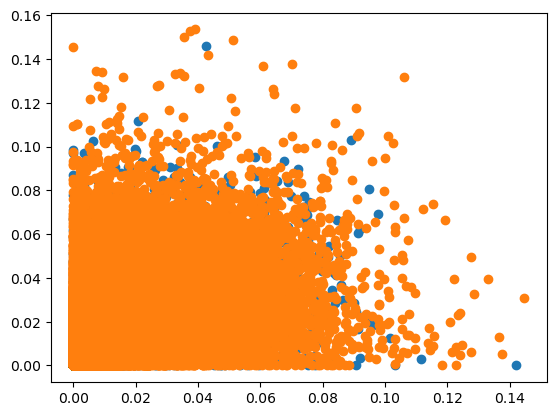

In [32]:
plt.scatter(x_dm[:, 0:256], x_dm[:, 256:512])
plt.scatter(x_health[:, 0:256], x_health[:, 256:512])

# Classify

## split data

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
trainX, testX, trainY, testY = train_test_split(x_pca, y_pca,  test_size=.3, shuffle=True, random_state=30)

In [24]:
from lightgbm import LGBMClassifier as LGBM
from imblearn.metrics import geometric_mean_score,specificity_score, sensitivity_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix,ConfusionMatrixDisplay
lgbm = LGBM(boosting_type='gbdt', n_estimators=500, num_leaves=30, random_state=42)
lgbm.fit(trainX, trainY)
y_pred = lgbm.predict(testX)
print("model name: lgbm")
print("acc", accuracy_score(y_pred, testY))
# print("precision", precision_score(y_pred, testY))
# print("recall", recall_score(y_pred, testY))
print("f1", f1_score(y_pred, testY, average = 'macro'))
print("g-mean: ", geometric_mean_score(testY, y_pred))
print(classification_report(y_pred, testY, digits = 3))
cm = confusion_matrix(y_pred, testY)

model name: lgbm
acc 0.7009966777408638
f1 0.6992406075139888
g-mean:  0.6970081076621941
              precision    recall  f1-score   support

           0      0.610     0.758     0.676       124
           1      0.796     0.661     0.722       177

    accuracy                          0.701       301
   macro avg      0.703     0.710     0.699       301
weighted avg      0.719     0.701     0.703       301



(1002, 1530)